Let's see, how clever and fast you are in coding

In [1]:
#Initial imports
from __plt__ import *
from __reader__ import *

In [2]:
#Merging databases
source_path = r'E:/LICENSE/ProgsData/main/GAMAforOleg.txt'
input_path = r'E:/backup/backup_BPT/GAMA_ETG_OLA.csv'
output_path = r'E:/databases/Merged.csv'

bids_age = [[8.8, 9.0], [9.0, 9.2], [9.2, 9.4], [9.4, 9.6], [9.6, 9.8], [9.8, 10.0]]
bids_mass = [[10.0, 10.25], [10.25, 10.5], [10.5, 10.75], [10.75, 11], [11, 11.25], [11.25, 11.5]]
bids_z = [[0.0, 0.05], [0.05, 0.1], [0.1, 0.15], [0.15, 0.2], [0.2, 0.25], [0.25, 0.34]]
merge_phys_databases(source_path, input_path, output_path)
calculating_mdms(output_path)

(1995, 1081)


e:\backup\backup_BPT\Sep2023\__reader__.py:12: DtypeWarning: Columns (0,241,244,245,270,284,290,294,305,319,323,340,356,357,375,389,391,430,449,451,467,468,500,521,632,684,716,728,761,769,770,771,772,773,775,821,850,918,950,968,973,1030,1031,1037,1038) have mixed types. Specify dtype option on import or set low_memory=False.
  DataFrame = pd.read_csv(output_path)


        BPT  WHAN  T_C_ISM_percentile16  T_C_ISM_percentile50  \
0       SFX  wAGN                16.588                18.463   
1      UNCX   LLR                19.763                22.388   
2      UNCX   ELR                20.638                22.213   
3      UNCX    RG                15.538                17.138   
4      NOEL    RG                15.563                17.388   
...     ...   ...                   ...                   ...   
1990  UNCXY    SF                16.238                18.688   
1991   UNCX    RG                16.838                20.413   
1992   SFXY    SF                21.213                23.513   
1993    SFX   UNC                16.113                18.238   
1994    SFX  wAGN                17.113                20.438   

      T_C_ISM_percentile84  ager_percentile50   P100_flux  P100_fluxerr  
0                   20.913              9.527    0.000000      0.037525  
1                   24.188              9.812    0.000000      0.090215

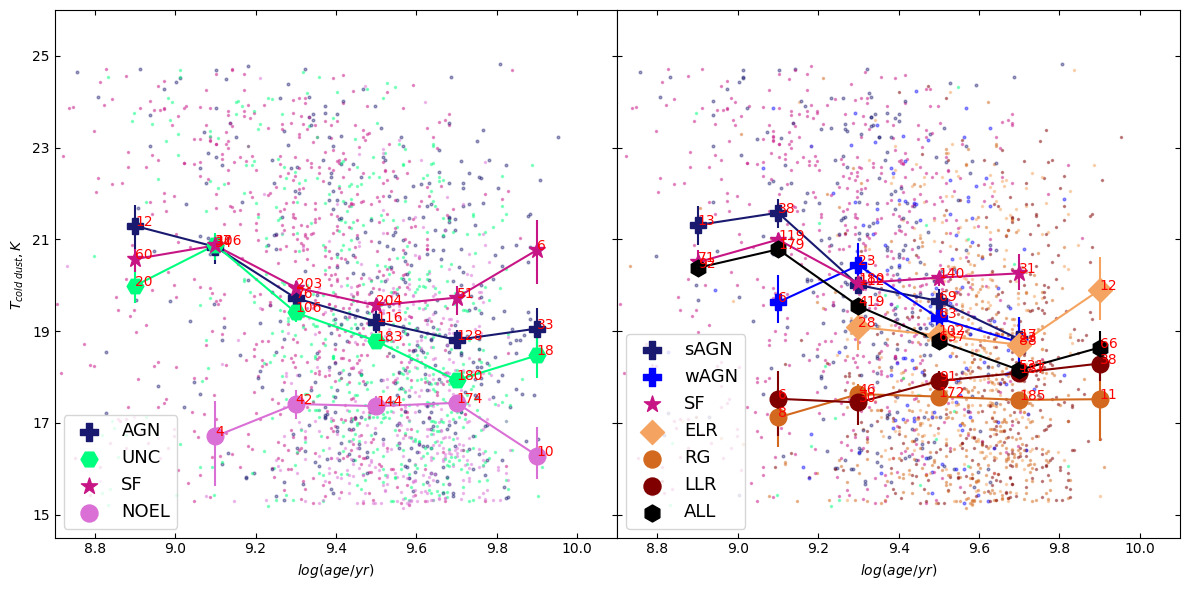

In [3]:
plotting({
    'input_path' : output_path,
    'x' : 'ager_percentile50',
    'y' : 'T_C_ISM_percentile50',
    'up' : 'T_C_ISM_percentile84',
    'down' : 'T_C_ISM_percentile16',
    'xlim' : [8.7, 10.1],
    'ylim' : [14.5, 26],
    'xticks' : np.arange(8.8, 10.1, 0.2),
    'yticks' : np.arange(15, 25.9, 2),
    'xlabel' : r'$log(age/yr)$',
    'ylabel' : r'$T_{cold \; dust}, K$',
    'bids': bids_age,
    'save_path' : r'./FIGURES/TDC_new.pdf'
})

        BPT  WHAN  T_W_BC_percentile16  T_W_BC_percentile50  \
0       SFX  wAGN               35.788               47.713   
1      UNCX   LLR               34.388               44.588   
2      UNCX   ELR               33.838               40.788   
3      UNCX    RG               35.088               44.838   
4      NOEL    RG               35.313               45.463   
...     ...   ...                  ...                  ...   
1990  UNCXY    SF               34.113               44.488   
1991   UNCX    RG               34.663               44.438   
1992   SFXY    SF               39.938               50.038   
1993    SFX   UNC               32.788               39.513   
1994    SFX  wAGN               33.513               41.688   

      T_W_BC_percentile84  ager_percentile50   P100_flux  P100_fluxerr  
0                  56.413              9.527    0.000000      0.037525  
1                  54.613              9.812    0.000000      0.090215  
2                  47.71

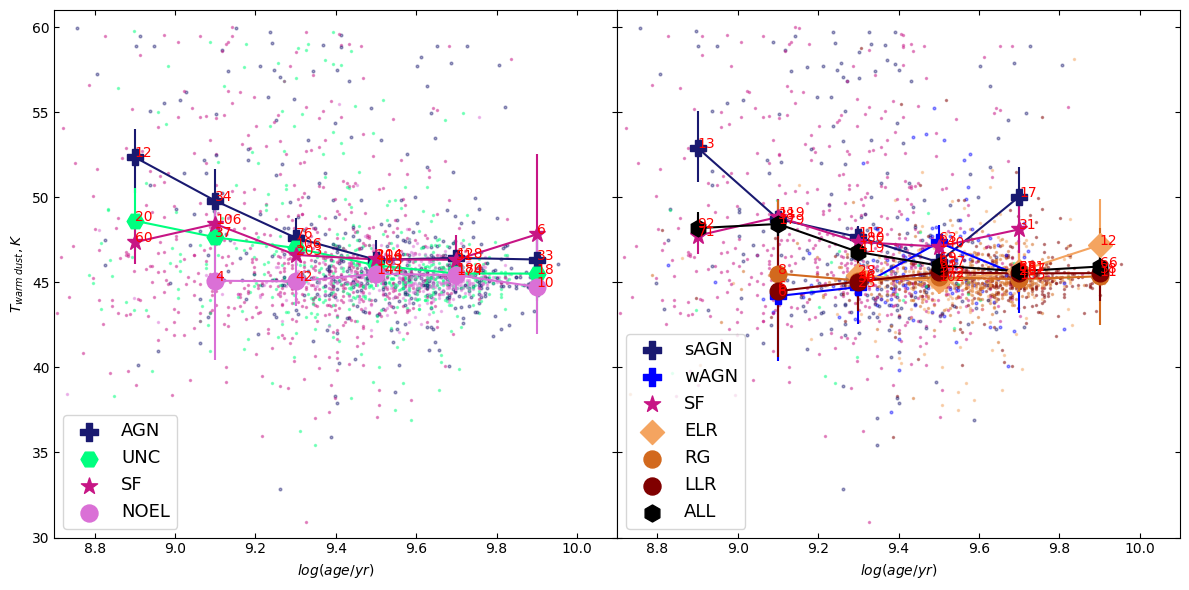

In [4]:
plotting({
    'input_path' : output_path,
    'x' : 'ager_percentile50',
    'y' : 'T_W_BC_percentile50',
    'up' : 'T_W_BC_percentile84',
    'down' : 'T_W_BC_percentile16',
    'xlim' : [8.7, 10.1],
    'ylim' : [30, 61],
    'xticks' : np.arange(8.8, 10.1, 0.2),
    'yticks' : np.arange(30, 61, 5),
    'xlabel' : r'$log(age/yr)$',
    'ylabel' : r'$T_{warm \; dust}, K$',
    'bids': bids_age,
    'save_path' : r'./FIGURES/TDW_new.pdf',
    'pacs' : True
})

        BPT  WHAN  mass_stellar_percentile50  SFR_0_1Gyr_percentile16  \
0       SFX  wAGN                     10.940                   -1.208   
1      UNCX   LLR                     10.810                   -2.168   
2      UNCX   ELR                     10.770                    0.432   
3      UNCX    RG                     10.820                   -1.808   
4      NOEL    RG                     11.070                   -0.803   
...     ...   ...                        ...                      ...   
1990  UNCXY    SF                     10.730                    0.657   
1991   UNCX    RG                     10.890                   -0.313   
1992   SFXY    SF                     10.260                    0.617   
1993    SFX   UNC                      8.282                   -1.998   
1994    SFX  wAGN                     10.490                   -0.303   

      SFR_0_1Gyr_percentile50  SFR_0_1Gyr_percentile84   P100_flux  \
0                       0.237                    0.36

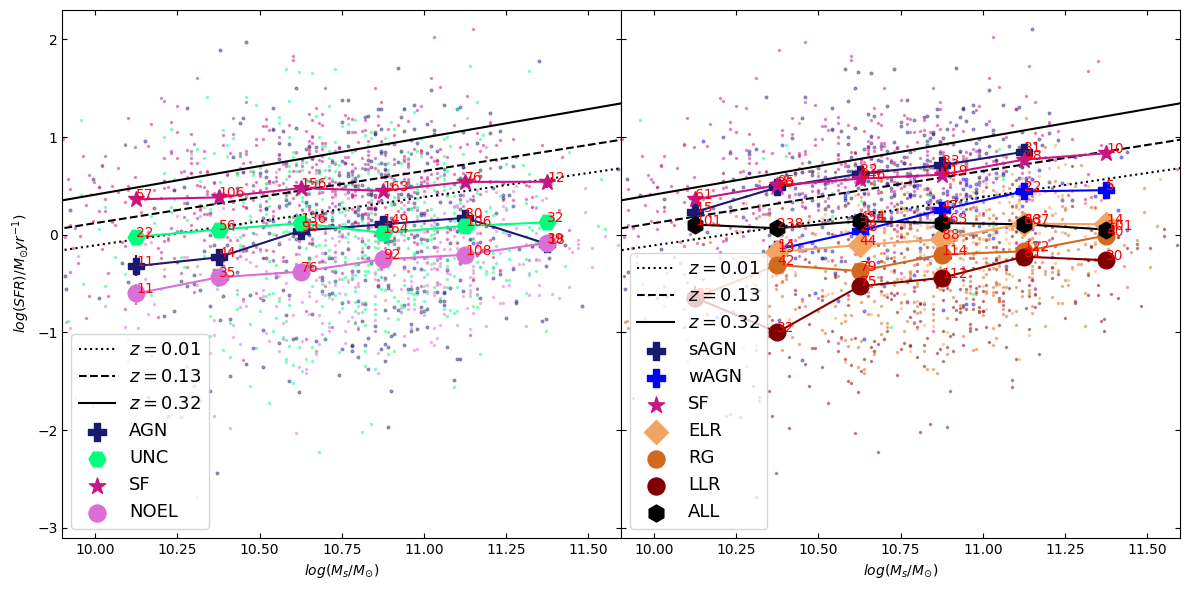

In [5]:
plotting({
    'input_path' : output_path,
    'x' : 'mass_stellar_percentile50',
    'y' : 'SFR_0_1Gyr_percentile50',
    'up' : 'SFR_0_1Gyr_percentile84',
    'down' : 'SFR_0_1Gyr_percentile16',
    'xlim' : [9.9, 11.6],
    'ylim' : [-3.1, 2.3],
    'xticks' : np.arange(10.0, 11.6, 0.25),
    'yticks' : np.arange(-3, 2.2, 1),
    'xlabel' : r'$log(M_s / M_{\odot})$',
    'ylabel' : r'$log(SFR) / M_{\odot} yr^{-1})$',
    'bids': bids_mass,
    'save_path' : r'./FIGURES/SFRSM_new.pdf',
    'theor_lines' : 'sfrsm'
})

        BPT  WHAN     Z_1  mass_stellar_percentile16  \
0       SFX  wAGN  0.1473                     10.870   
1      UNCX   LLR  0.0295                     10.730   
2      UNCX   ELR  0.0549                     10.720   
3      UNCX    RG  0.1389                     10.730   
4      NOEL    RG  0.1846                     10.970   
...     ...   ...     ...                        ...   
1990  UNCXY    SF  0.2549                     10.640   
1991   UNCX    RG  0.2800                     10.810   
1992   SFXY    SF  0.1379                     10.160   
1993    SFX   UNC  0.0260                      8.152   
1994    SFX  wAGN  0.1293                     10.400   

      mass_stellar_percentile50  mass_stellar_percentile84   P100_flux  \
0                        10.940                     10.980    0.000000   
1                        10.810                     10.910    0.000000   
2                        10.770                     10.890 -999.000000   
3                        10.820

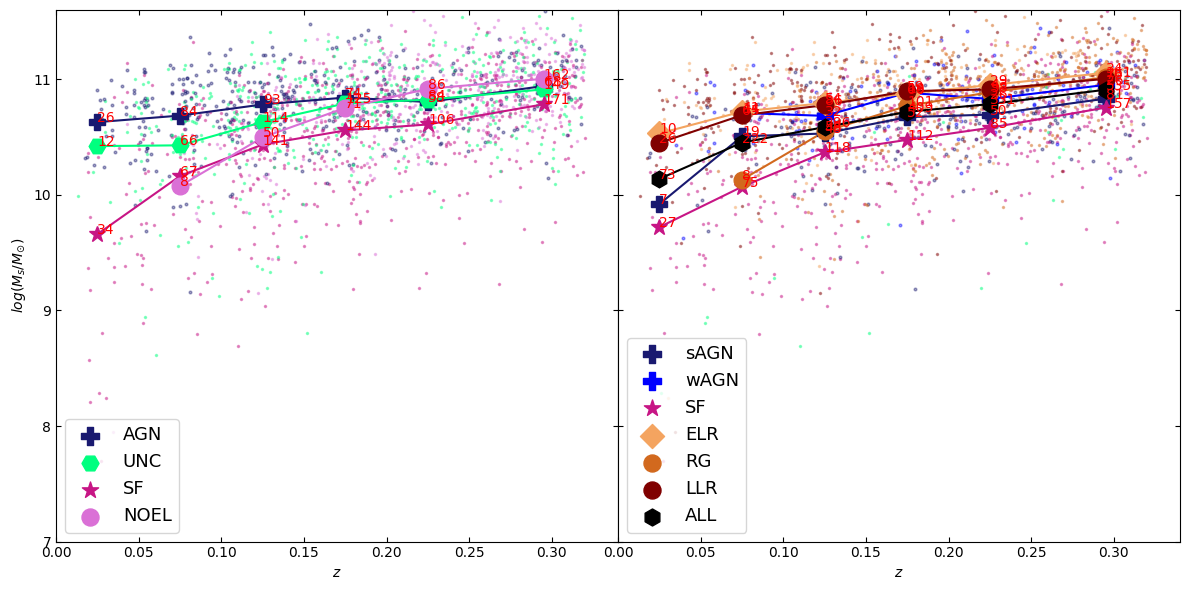

In [6]:
plotting({
    'input_path' : output_path,
    'x' : 'Z_1',
    'y' : 'mass_stellar_percentile50',
    'up' : 'mass_stellar_percentile84',
    'down' : 'mass_stellar_percentile16',
    'xlim' : [0.0, 0.34],
    'ylim' : [7, 11.6],
    'xticks' : np.arange(0.0, 0.34, 0.05),
    'yticks' : np.arange(7, 11.1, 1),
    'xlabel' : r'$z$',
    'ylabel' : r'$log(M_s / M_{\odot})$',
    'bids': bids_z,
    'save_path' : r'./FIGURES/MS_z.pdf'
})

        BPT  WHAN  mass_stellar_percentile16  mass_stellar_percentile50  \
0       SFX  wAGN                     10.870                     10.940   
1      UNCX   LLR                     10.730                     10.810   
2      UNCX   ELR                     10.720                     10.770   
3      UNCX    RG                     10.730                     10.820   
4      NOEL    RG                     10.970                     11.070   
...     ...   ...                        ...                        ...   
1990  UNCXY    SF                     10.640                     10.730   
1991   UNCX    RG                     10.810                     10.890   
1992   SFXY    SF                     10.160                     10.260   
1993    SFX   UNC                      8.152                      8.282   
1994    SFX  wAGN                     10.400                     10.490   

      mass_stellar_percentile84  ager_percentile50   P100_flux  P100_fluxerr  
0                   

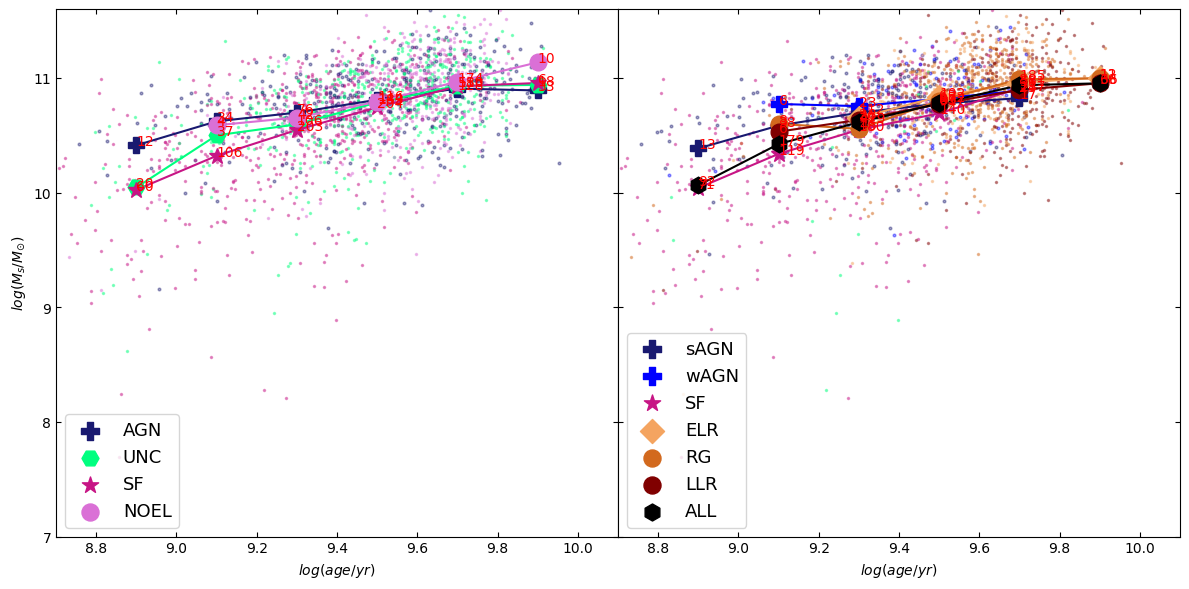

In [7]:
plotting({
    'input_path' : output_path,
    'x' : 'ager_percentile50',
    'y' : 'mass_stellar_percentile50',
    'up' : 'mass_stellar_percentile84',
    'down' : 'mass_stellar_percentile16',
    'xlim' : [8.7, 10.1],
    'ylim' : [7, 11.6],
    'xticks' : np.arange(8.8, 10.1, 0.2),
    'yticks' : np.arange(7, 11.1, 1),
    'xlabel' : r'$log(age/yr)$',
    'ylabel' : r'$log(M_s / M_{\odot})$',
    'bids': bids_age,
    'save_path' : r'./FIGURES/MS_age.pdf'
})

        BPT  WHAN  mass_dust_percentile16  mass_dust_percentile50  \
0       SFX  wAGN                   7.497                   7.737   
1      UNCX   LLR                   5.812                   6.027   
2      UNCX   ELR                   7.522                   7.592   
3      UNCX    RG                   7.282                   7.632   
4      NOEL    RG                   7.737                   8.047   
...     ...   ...                     ...                     ...   
1990  UNCXY    SF                   7.842                   8.137   
1991   UNCX    RG                   7.467                   7.707   
1992   SFXY    SF                   6.937                   7.152   
1993    SFX   UNC                   5.897                   6.107   
1994    SFX  wAGN                   7.027                   7.242   

      mass_dust_percentile84  ager_percentile50   P100_flux  P100_fluxerr  
0                      7.962              9.527    0.000000      0.037525  
1                  

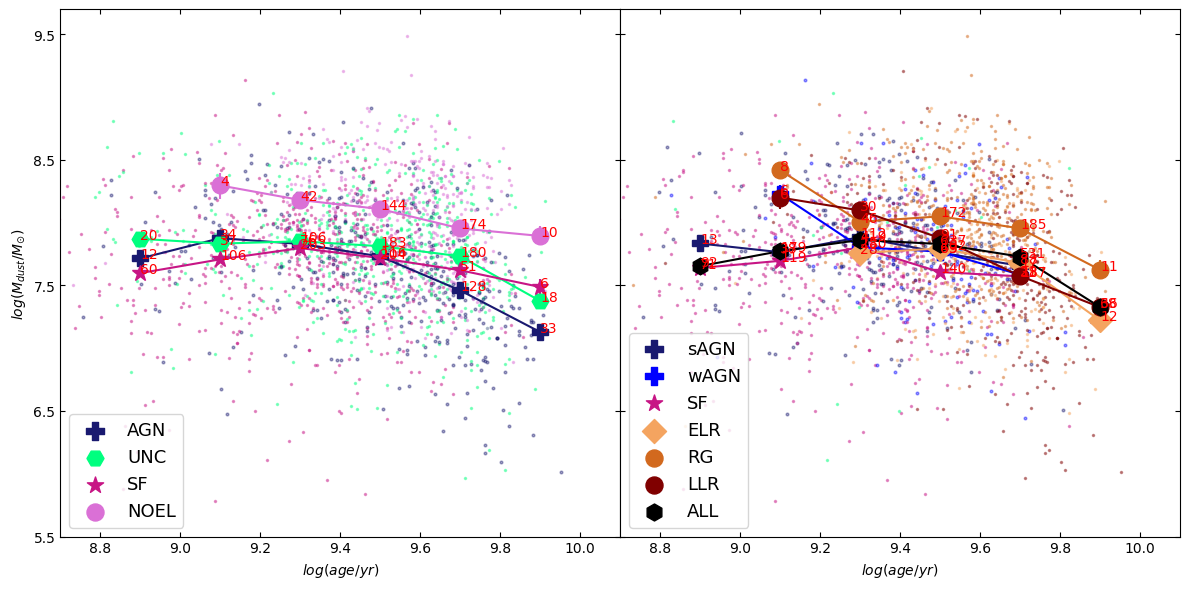

In [8]:
plotting({
    'input_path' : output_path,
    'x' : 'ager_percentile50',
    'y' : 'mass_dust_percentile50',
    'up' : 'mass_dust_percentile84',
    'down' : 'mass_dust_percentile16',
    'xlim' : [8.7, 10.1],
    'ylim' : [5.5, 9.7],
    'xticks' : np.arange(8.8, 10.1, 0.2),
    'yticks' : np.arange(5.5, 9.7, 1),
    'xlabel' : r'$log(age/yr)$',
    'ylabel' : r'$log(M_{dust}/M_{\odot})$',
    'bids': bids_age,
    'save_path' : r'./FIGURES/MD_age_new.pdf'
})

        BPT  WHAN  ager_percentile50   P100_flux  P100_fluxerr  \
0       SFX  wAGN              9.527    0.000000      0.037525   
1      UNCX   LLR              9.812    0.000000      0.090215   
2      UNCX   ELR              9.462 -999.000000   -999.000000   
3      UNCX    RG              9.522    0.000000      0.021025   
4      NOEL    RG              9.572 -999.000000   -999.000000   
...     ...   ...                ...         ...           ...   
1990  UNCXY    SF              9.372    0.024159      0.014794   
1991   UNCX    RG              9.662    0.034172      0.014857   
1992   SFXY    SF              9.317    0.104365      0.014035   
1993    SFX   UNC              9.217    0.011026      0.018559   
1994    SFX  wAGN              9.402    0.000000      0.028337   

      mdms_percentile50  mdms_percentile16  mdms_percentile84  
0                -3.203          -3.446311          -2.967363  
1                -4.783          -5.020118          -4.501397  
2              

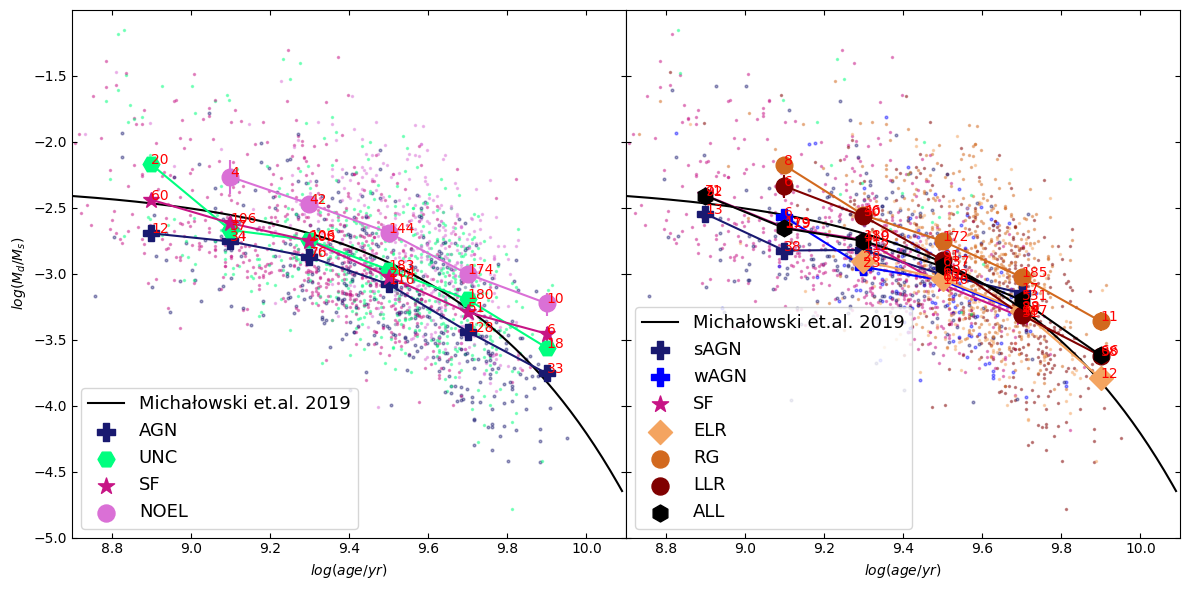

In [9]:
plotting({
    'input_path' : output_path,
    'x' : 'ager_percentile50',
    'y' : 'mdms_percentile50',
    'up' : 'mdms_percentile84',
    'down' : 'mdms_percentile16',
    'xlim' : [8.7, 10.1],
    'ylim' : [-5, -1],
    'xticks' : np.arange(8.8, 10.1, 0.2),
    'yticks' : np.arange(-5, -1, 0.5),
    'xlabel' : r'$log(age/yr)$',
    'ylabel' : r'$log(M_{d}/M_{s})$',
    'bids': bids_age,
    'save_path' : r'./FIGURES/MDMS_age_new.pdf',
    'theor_lines' : 'mdms'
})

        BPT  WHAN     Z_1  ager_percentile16  ager_percentile50  \
0       SFX  wAGN  0.1473              9.452              9.527   
1      UNCX   LLR  0.0295              9.687              9.812   
2      UNCX   ELR  0.0549              9.392              9.462   
3      UNCX    RG  0.1389              9.382              9.522   
4      NOEL    RG  0.1846              9.417              9.572   
...     ...   ...     ...                ...                ...   
1990  UNCXY    SF  0.2549              9.222              9.372   
1991   UNCX    RG  0.2800              9.557              9.662   
1992   SFXY    SF  0.1379              9.122              9.317   
1993    SFX   UNC  0.0260              8.997              9.217   
1994    SFX  wAGN  0.1293              9.317              9.402   

      ager_percentile84   P100_flux  P100_fluxerr  
0                 9.602    0.000000      0.037525  
1                 9.957    0.000000      0.090215  
2                 9.652 -999.000000   -

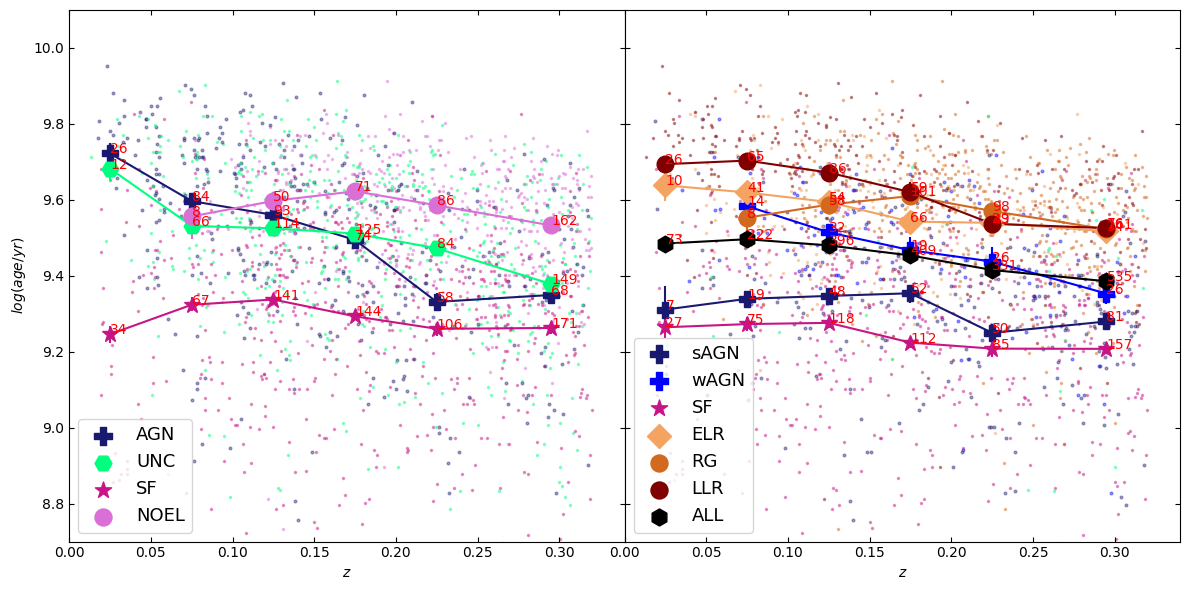

In [10]:
plotting({
    'input_path' : output_path,
    'x' : 'Z_1',
    'y' : 'ager_percentile50',
    'up' : 'ager_percentile84',
    'down' : 'ager_percentile16',
    'xlim' : [0.0, 0.34],
    'ylim' : [8.7, 10.1],
    'xticks' : np.arange(0.0, 0.34, 0.05),
    'yticks' : np.arange(8.8, 10.1, 0.2),
    'xlabel' : r'$z$',
    'ylabel' : r'$log(age/yr)$',
    'bids': bids_z,
    'save_path' : r'./FIGURES/Age_z_new.pdf'
})

In [11]:
# plotting({
#     'input_path' : output_path,
#     'x' : 'mass_stellar_percentile50',
#     'y' : 'SurfaceDensity',
#     'err' : 'SurfaceDensityErr',
#     'xlim' : [9.9, 11.6],
#     'ylim' : [0, 100],
#     'xticks' : np.arange(10.0, 11.6, 0.25),
#     'yticks' : np.arange(0, 100, 10),
#     'xlabel' : r'$log(M_s/M_{\odot})$',
#     'ylabel' : r'$SurfaceDensity$',
#     'bids': bids_mass,
#     'save_path' : r'./FIGURES/Age_z_new.pdf'
# })